# Analyse des vols US 2015
Objectif : analyser les vols non annulés, les retards et tendances par compagnies, aéroports et temporalité.
Dataset : flights.csv (nettoyé)


# Imports

In [3]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyarrow

# 3 Chargement du dataset clean 

In [5]:
flights = pd.read_csv("data/flights_cleaned_polars.csv")
airlines = pd.read_csv("data/airlines.csv")
airports = pd.read_csv("data/airports.csv")

C:\Users\kylli\AppData\Local\Temp\ipykernel_14080\2002135917.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("data/flights_cleaned_polars.csv")


### Verification de l'import

In [6]:
flights.head()
flights.info()
airlines.head()
airports.head()
airlines.info()
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729195 entries, 0 to 5729194
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DAY_OF_WEEK          int64  
 1   AIRLINE              object 
 2   ORIGIN_AIRPORT       object 
 3   DESTINATION_AIRPORT  object 
 4   DEPARTURE_DELAY      int64  
 5   ARRIVAL_DELAY        float64
 6   CANCELLED            int64  
 7   CANCELLATION_REASON  float64
 8   AIR_SYSTEM_DELAY     float64
 9   SECURITY_DELAY       float64
 10  AIRLINE_DELAY        float64
 11  LATE_AIRCRAFT_DELAY  float64
 12  WEATHER_DELAY        float64
 13  DISTANCE             int64  
 14  DATE                 object 
dtypes: float64(7), int64(4), object(4)
memory usage: 655.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-nul

# Conversion des dates

In [ ]:
flights["DATE"] = pd.to_datetime(flights["DATE"])


# Jointures des données (Enrichir le dataset)

- Ajouter le nom de la compagnie:

In [ ]:
flights = flights.merge(airlines, left_on="AIRLINE", 
                        right_on="IATA_CODE", how="left")


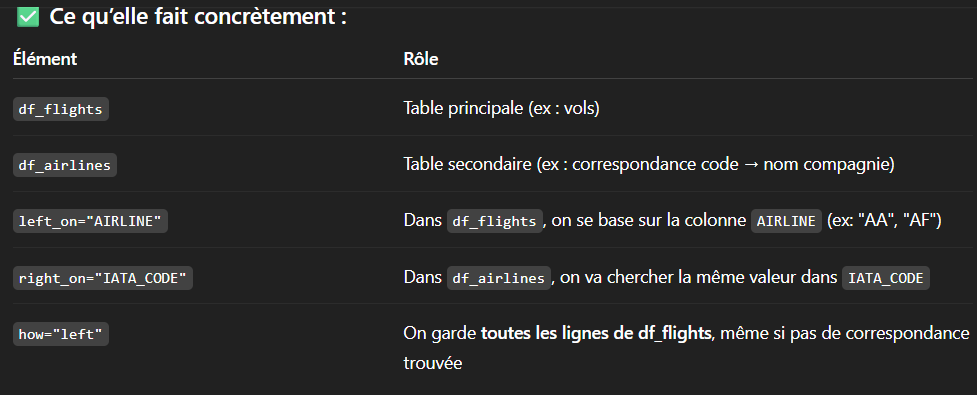

- Ajouter l’aéroport de départ:

In [ ]:
flights = flights.merge(
    airports[["IATA_CODE", "AIRPORT"]],
    left_on="ORIGIN_AIRPORT",
    right_on="IATA_CODE",
    how="left"
).rename(columns={"AIRPORT": "ORIGIN_NAME"})

flights = flights.merge(
    airports[["IATA_CODE", "AIRPORT"]],
    left_on="DESTINATION_AIRPORT",
    right_on="IATA_CODE",
    how="left"
).rename(columns={"AIRPORT": "DEST_NAME"})


# Statistiques globales

* Objectif : indicateurs clés

- % de vols en retard

- Retard moyen

- Distance moyenne

- Nb total de vols

In [ ]:
print("Total vols :", len(flights))
print("Retard moyen arrivée :", flights["ARRIVAL_DELAY"].mean())
print("Retard moyen départ :", flights["DEPARTURE_DELAY"].mean())


Total vols : 5729195
Retard moyen arrivée : 4.407057357987598
Retard moyen départ : 9.338837306113685


# Visualisations importantes

### 1. Retard moyen par compagnie (Bar Chart)

In [ ]:
print(flights.columns.tolist())


['DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DISTANCE', 'DATE', 'ORIGIN_NAME', 'DEST_NAME', 'AIRLINE']


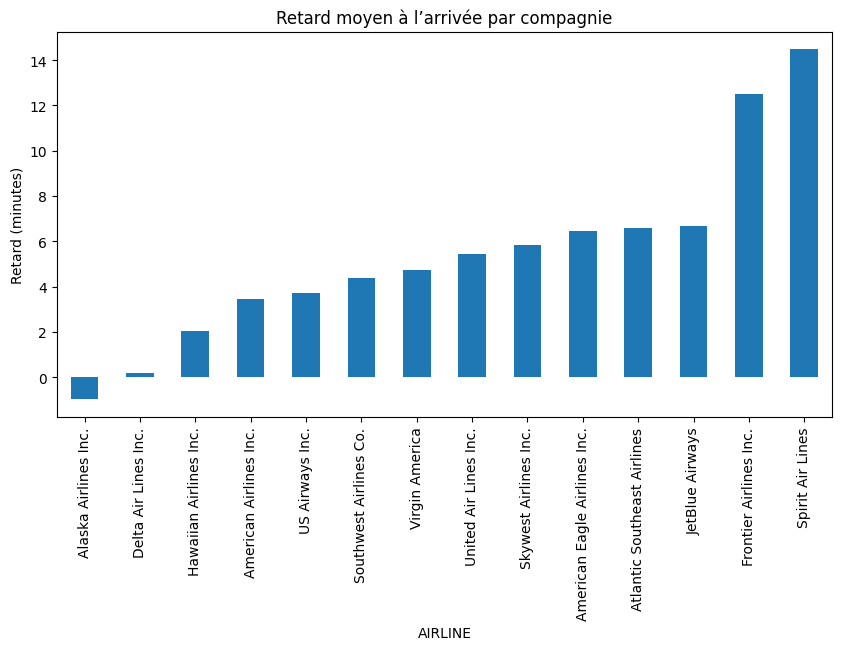

In [ ]:
avg_airline_delay = flights.groupby("AIRLINE")["ARRIVAL_DELAY"].mean().sort_values()

plt.figure(figsize=(10,5))
avg_airline_delay.plot(kind="bar")
plt.title("Retard moyen à l’arrivée par compagnie")
plt.ylabel("Retard (minutes)")
plt.show()


# 2. Top 10 aéroports avec le plus de retard

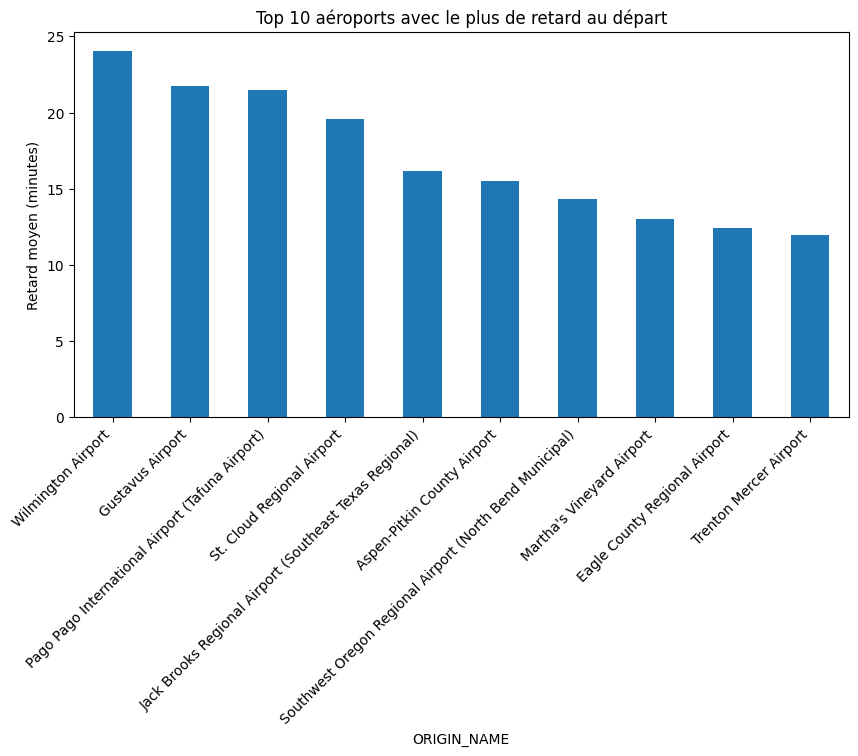

In [ ]:
top_airports = flights.groupby("ORIGIN_NAME")["ARRIVAL_DELAY"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_airports.plot(kind="bar")
plt.title("Top 10 aéroports avec le plus de retard au départ")
plt.ylabel("Retard moyen (minutes)")
plt.xticks(rotation=45, ha='right')
plt.show()


# Retard au fil du temps

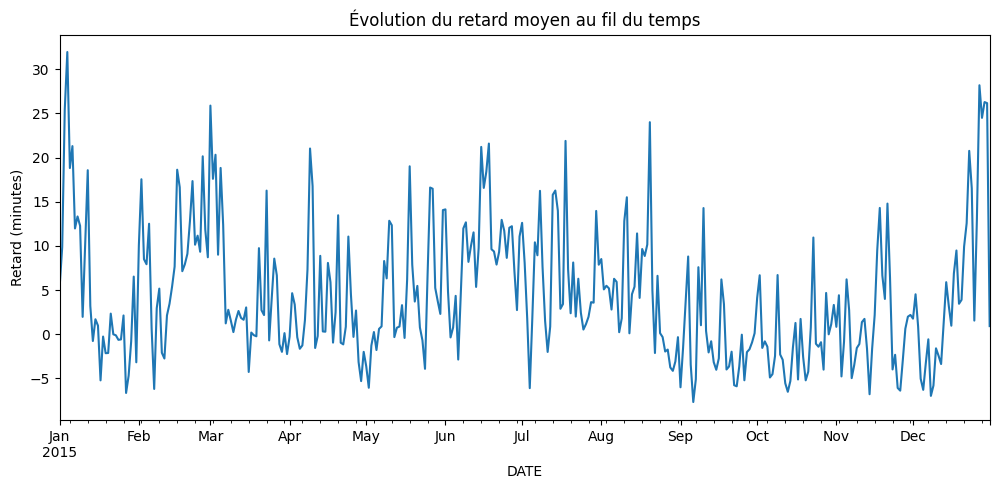

In [ ]:
flights.groupby("DATE")["ARRIVAL_DELAY"].mean().plot(figsize=(12,5))
plt.title("Évolution du retard moyen au fil du temps")
plt.ylabel("Retard (minutes)")
plt.show()


# Retard au fil des jours

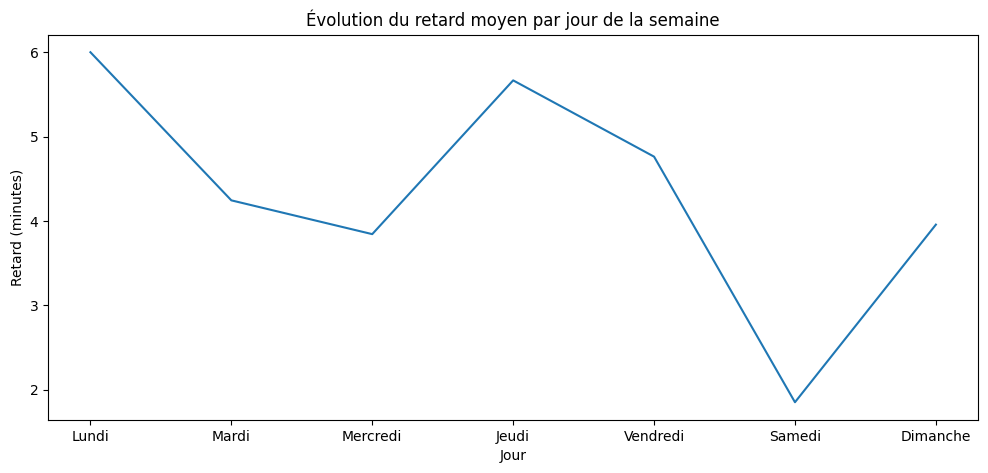

In [ ]:
# Mapping des jours
jours = {
    1: "Lundi",
    2: "Mardi",
    3: "Mercredi",
    4: "Jeudi",
    5: "Vendredi",
    6: "Samedi",
    7: "Dimanche"
}

# Remplacement des chiffres par les noms
flights["DAY_OF_WEEK"] = flights["DAY_OF_WEEK"].map(jours)

# Group by + plot
flights.groupby("DAY_OF_WEEK")["ARRIVAL_DELAY"].mean().reindex(jours.values()).plot(figsize=(12,5))
plt.title("Évolution du retard moyen par jour de la semaine")
plt.ylabel("Retard (minutes)")
plt.xlabel("Jour")
plt.show()


# Distribution des retards

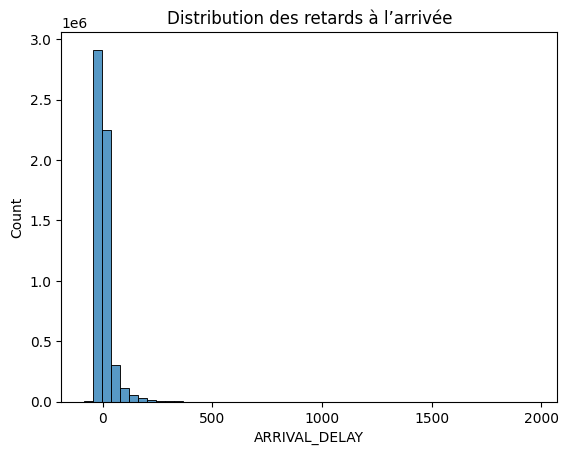

In [ ]:
sns.histplot(flights["ARRIVAL_DELAY"], bins=50)
plt.title("Distribution des retards à l’arrivée")
plt.show()


# Insights clés


# 4. Retard au fil du temps

Écris des conclusions comme :

- La compagnie avec le plus de retard est…

- Les aéroports les plus impactés sont…

- On observe un pic de retard en…

- La majorité des vols ont X minutes de retard…

# Export pour dashboard

In [ ]:
flights.to_csv("data/dashboard_flights.csv", index=False)
print("✅ Prêt pour dashboard !")


✅ Prêt pour dashboard !
